In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [46]:
class ACORN:
    def __init__(self) -> None:

        self.k = 25         # Order k
        self.maxint = 2**60 # Modulus M

        self.ixv1 = np.zeros(self.k+1)
        self.ixv2 = np.zeros(self.k+1)

        return

    def random(self,seed,N):

        self.ixv1[0] = 2**52-seed #inital seed(?) 
        self.ixv2[0] = 0#2**10-seed #inital seed(?)

        rnd_arr = np.zeros(N)

        for j in range(N):
            for i in range(self.k):
                self.ixv1[i+1] =  self.ixv1[i+1]+ self.ixv1[i]
                self.ixv2[i+1] =  self.ixv2[i+1]+ self.ixv2[i]

                if self.ixv2[i+1]>= self.maxint:
                    self.ixv2[i+1]= self.ixv2[i+1]-self.maxint
                    self.ixv1[i+1]= self.ixv1[i+1]+1

                if  self.ixv1[i+1]>=self.maxint:
                    self.ixv1[i+1]= self.ixv1[i+1]-self.maxint

            rnd_arr[j] = (self.ixv1[self.k]+(self.ixv2[self.k]/self.maxint))/self.maxint
            
        return rnd_arr

In [47]:

rnd = ACORN()

a = rnd.random(393,1000)



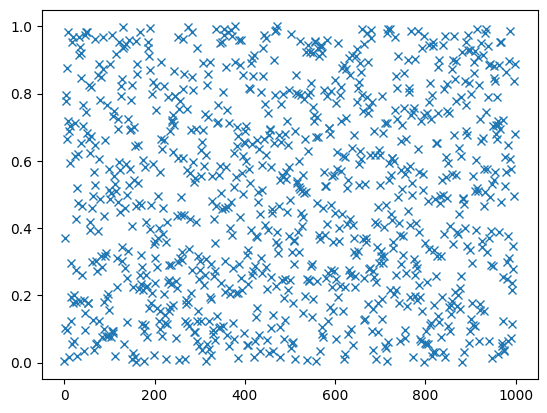

In [48]:
plt.plot(a,'x')

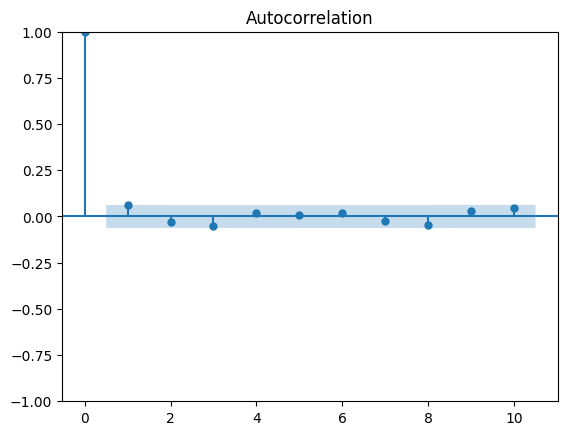

In [42]:

acf = sm.tsa.stattools.acf(a, nlags = 10, fft=False)

fig2 = tsaplots.plot_acf(a, lags=10, fft=False)
plt.show()